# UT2000 Home Environment Exploratory Analysis
We now take a closer look at the beacon and home environment survey data to see if we can tease anything out of it or at least show something. 

In [1]:
import math

# Data Import
We have two things to import: (1) the home environment survey and (2) the beacon data

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

## Home Environment Survey
The get the home environment survey data, please make sure to run ```$ python3 src/data/make_dataset.py``` and choose the option for the HEH survey. This will combine, clean, and save the home environment survey data to the processed data directory.

In [3]:
HEH = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut3000-heh.csv')

## Beacons
To get the beacon data for the UT2000 study, be sure ture run ```$ python3 src/data/make_dataset.py``` and chooose the option for the ut2000 beacons. This will combine, clean, and save the beacon data to the processed data directory.

In [17]:
beacons = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/processed/ut2000-beacon.csv',
                      index_col=0,parse_dates=True,infer_datetime_format=True)

# Visualization and Analysis
Now we get to the meat of it - visualizing and doing some simple statistics on the data.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Initial Look
Here we plot up the data simply to see how it looks.

In [18]:
beacons.head()

,pm1.0,pm2.5,pm10,std1.0,std2.5,std10,pc0.3,pc0.5,pc1.0,pc2.5,pc5.0,pc10.0,eco2,TVOC,RH,TC,number
datetime,,,,,,,,,,,,,,,,,
2019-02-26 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,0.0,37.032035,24.563401,6
2019-02-26 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.5,3.5,37.022877,24.556725,6
2019-02-26 17:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.5,0.0,37.101476,24.556725,6
2019-02-26 17:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,403.5,0.5,37.025167,24.612802,6
2019-02-26 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.0,13.5,37.095371,24.584764,6


## Individual Heat Maps

In [85]:
def plot_heat_map(df):
    '''
    
    '''
    
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(data=df,cmap='inferno_r',cbar=False,square=False,ax=ax)
    labels = []
    for d in df.index:
        labels.append(datetime.strftime(d,'%m/%d'))
    ax.set_yticklabels(labels)
    ax.set_ylabel('Day in 2019')
    ax.set_xlabel('Hour of Day')

    return ax

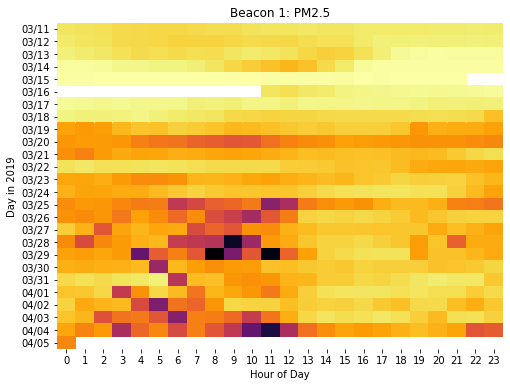

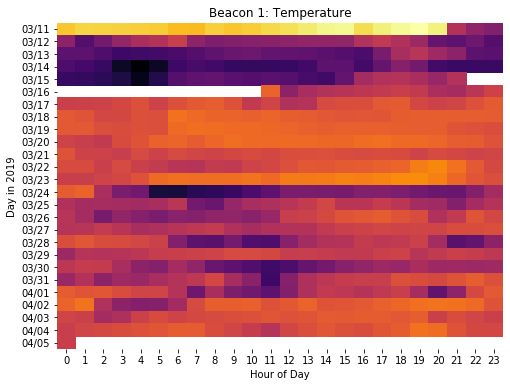

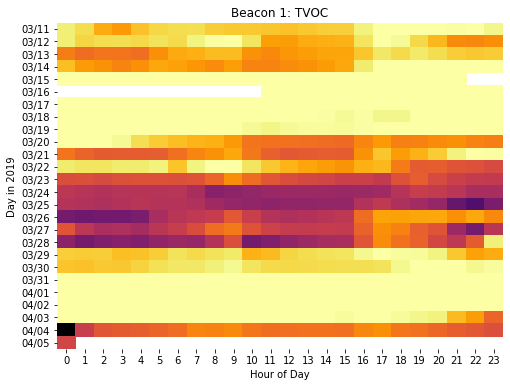

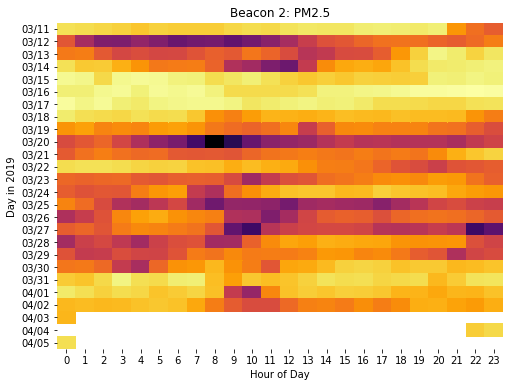

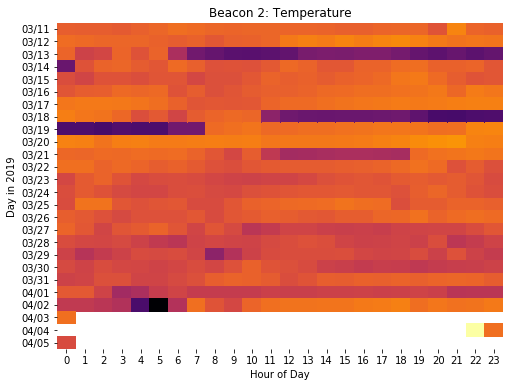

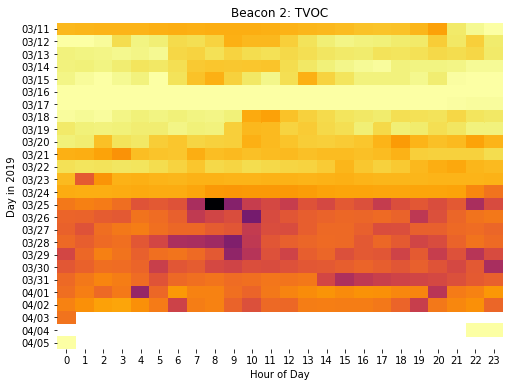

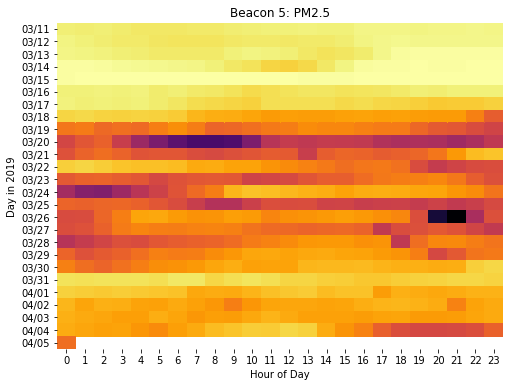

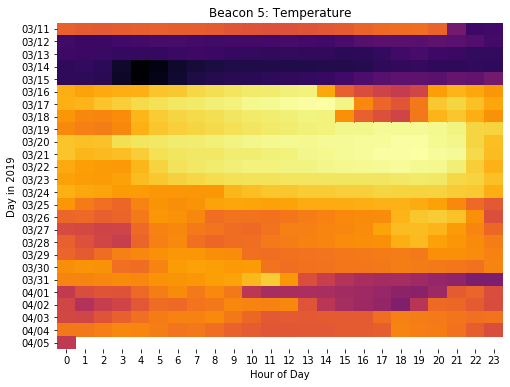

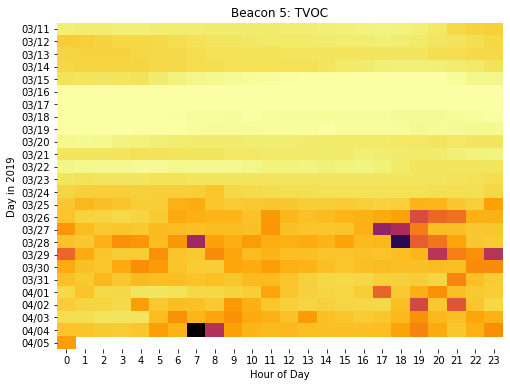

In [86]:
for no in [1,2,5]:
    df = beacons[beacons['number'] == no]
    df = df.resample('1h').mean()
    df['hour'] = df.index.hour
    df['day'] = df.index.date
    df = df.dropna()
    df = df[datetime(2019,3,11):datetime(2019,4,5)]
    df_hm = df.pivot_table(index='day',columns='hour',values='pm2.5')
    if len(df_hm) > 7:
        ax = plot_heat_map(df_hm)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-pm2p5-heatmap.png')
        ax.set_title(f'Beacon {no}: PM2.5')
        plt.show()
        plt.close()
    
    df_tc = df.pivot_table(index='day',columns='hour',values='TC')
    if len(df_tc) > 7:
        ax = plot_heat_map(df_tc)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-tc-heatmap.png')
        ax.set_title(f'Beacon {no}: Temperature')
        plt.show()
        plt.close()
        
    df_tvoc = df.pivot_table(index='day',columns='hour',values='TVOC')
    if len(df_tvoc) > 7:
        ax = plot_heat_map(df_tvoc)
        plt.savefig(f'/Users/hagenfritz/Projects/utx000/reports/figures/framework_paper/ut2000-beacon{no}-tvoc-heatmap.png')
        ax.set_title(f'Beacon {no}: TVOC')
        plt.show()
        plt.close()
        